# Define the system  

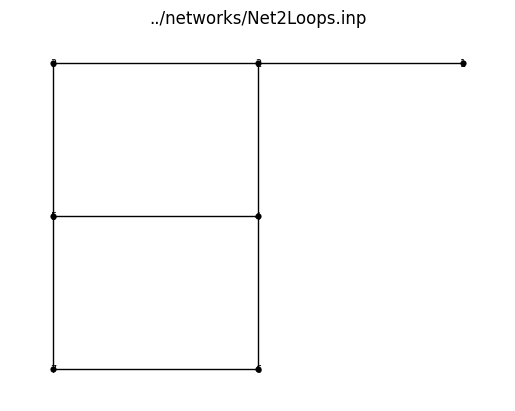

cons:
mass_balance[2]:   (((expected_demand[2]-flow[1])+flow[2])+flow[3])
mass_balance[3]:   ((expected_demand[3]-flow[2])+flow[7])
mass_balance[4]:   (((expected_demand[4]-flow[3])+flow[4])+flow[5])
mass_balance[5]:   (((expected_demand[5]-flow[4])-flow[7])+flow[8])
mass_balance[6]:   ((expected_demand[6]-flow[5])+flow[6])
mass_balance[7]:   ((expected_demand[7]-flow[6])-flow[8])
approx_hazen_williams_headloss[1]:   (((((((-((sign(flow[1]))))*hw_resistance[1])*((abs(flow[1]))**1.852))-((1e-05*(hw_resistance[1]**0.5))*flow[1]))-(((sign(flow[1]))*minor_loss[1])*(flow[1]**2.0)))+source_head[1])-head[2])
approx_hazen_williams_headloss[2]:   (((((((-((sign(flow[2]))))*hw_resistance[2])*((abs(flow[2]))**1.852))-((1e-05*(hw_resistance[2]**0.5))*flow[2]))-(((sign(flow[2]))*minor_loss[2])*(flow[2]**2.0)))+head[2])-head[3])
approx_hazen_williams_headloss[3]:   (((((((-((sign(flow[3]))))*hw_resistance[3])*((abs(flow[3]))**1.852))-((1e-05*(hw_resistance[3]**0.5))*flow[3]))-(((sign(flow[3]))*minor

In [83]:
import wntr
import wntr_quantum
import numpy as np 
from wntr.sim.hydraulics import create_hydraulic_model

# Create a water network model
inp_file = '../networks/Net0_HW.inp'
inp_file = '../networks/Net2Loops.inp'
# inp_file = '../networks/Net2Loops.inp'
wn0 = wntr.network.WaterNetworkModel(inp_file)

# Graph the network
wntr.graphics.plot_network(wn0, title=wn0.name, node_labels=True)

model, updater = create_hydraulic_model(wn0, HW_approx='default')
print(model.__str__())


In [84]:
model.hw_resistance['3'].value * 0.077**2

0.3487722352119913

In [85]:
import wntr 
sim = wntr.sim.WNTRSimulator(wn0)
results = sim.run_sim()
print(results.node['pressure'].values)
print(results.link['flowrate'].values)

[[53.248 30.665 44.321 28.81  30.547 27.058  0.   ]]
[[ 0.311  0.051  0.232  0.032  0.167  0.075  0.024 -0.019]]


In [86]:
wn0.links['3'].diameter = 0.203
sim = wntr.sim.WNTRSimulator(wn0)
results = sim.run_sim()
print(results.node['pressure'].values)
print(results.link['flowrate'].values)

[[ 53.248   0.263 -84.231 -82.956 -96.87  -95.268   0.   ]]
[[0.311 0.1   0.183 0.013 0.137 0.046 0.072 0.01 ]]


## Expression of he network

In [87]:


# Create a water network model
inp_file = '../networks/Net0_CM.inp'
inp_file = '../networks/Net1Loops_CM_original_values.inp'
inp_file = '../networks/Net2LoopsCM.inp'
wn = wntr.network.WaterNetworkModel(inp_file)



In [88]:
from wntr_quantum.scenario.network_qubo import Network
from qubols.solution_vector import SolutionVector_V2 as SolutionVector
from qubols.encodings import  RangedEfficientEncoding, PositiveQbitEncoding


nqbit = 9
step = (0.25/(2**nqbit-1))
flow_encoding = PositiveQbitEncoding(nqbit=nqbit, step=step, offset=+0.0, var_base_name="x")

nqbit = 9
step = (250/(2**nqbit-1))
head_encoding = PositiveQbitEncoding(nqbit=nqbit, step=step, offset=+0.0, var_base_name="x")


# nqbit = 5
# flow_encoding = RangedEfficientEncoding(nqbit=nqbit, range=5., offset=+0.0, var_base_name="x")
# head_encoding = RangedEfficientEncoding(nqbit=nqbit, range=5, offset=+0.0, var_base_name="x")

net = Network(wn, flow_encoding=flow_encoding, 
              head_encoding=head_encoding)

In [89]:
# print(net.m.__str__())

In [90]:
# net.matrices[2] = net.matrices[2]*4
ref_sol = net.classical_solutions()
ref_sol

Warning, we didn't reach the required tolerance within 100 iterations, error is at 11648.68115427426


/home/nico/QuantumApplicationLab/QuantumNewtonRaphson/quantum_newton_raphson/utils.py:74: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn("spsolve requires A be CSC or CSR matrix format", SparseEfficiencyWarning)


AssertionError: 

In [31]:
net.wn.links['3'].diameter = 0.203
net.m, net.model_updater = net.create_cm_model()
net.matrices = net.initialize_matrices()
ref_sol = net.classical_solutions()
ref_sol

/home/nico/QuantumApplicationLab/QuantumNewtonRaphson/quantum_newton_raphson/utils.py:74: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn("spsolve requires A be CSC or CSR matrix format", SparseEfficiencyWarning)


array([ 1.639e-01,  6.607e-02,  7.003e-02,  3.830e-02,  3.670e-02,  2.018e+02,  1.005e+02,  8.800e+01, -5.306e+01])

In [64]:
from qubols.mixed_solution_vector import MixedSolutionVector_V2 as MixedSolutionVector

nqbit = 9
step = (1/(2**nqbit-1))
encoding = PositiveQbitEncoding(nqbit=nqbit, step=step, offset=+0.0, var_base_name="x")
sv1 = SolutionVector(5, encoding=encoding)

nqbit = 11
step = (40/(2**nqbit-1))
encoding = PositiveQbitEncoding(nqbit=nqbit, step=step, offset=+175, var_base_name="x")
sv2 = SolutionVector(1, encoding=encoding)

nqbit = 11
step = (40/(2**nqbit-1))
encoding = PositiveQbitEncoding(nqbit=nqbit, step=step, offset=+90, var_base_name="x")
sv3 = SolutionVector(1, encoding=encoding)

nqbit = 11
step = (40/(2**nqbit-1))
encoding = PositiveQbitEncoding(nqbit=nqbit, step=step, offset=+180, var_base_name="x")
sv4 = SolutionVector(1, encoding=encoding)

nqbit = 11
step = (40/(2**nqbit-1))
encoding = PositiveQbitEncoding(nqbit=nqbit, step=step, offset=+0, var_base_name="x")
sv5 = SolutionVector(1, encoding=encoding)

net.mixed_solution_vector = MixedSolutionVector([sv1,sv2,sv3,sv4,sv5])
net.matrices = net.initialize_matrices()

In [65]:
(40/(2**9-1))

0.07827788649706457

In [66]:
np.sort(flow_encoding.get_possible_values())

array([0.   , 0.   , 0.001, 0.001, 0.002, 0.002, 0.003, 0.003, 0.004, 0.004, 0.005, 0.005, 0.006, 0.006, 0.007, 0.007, 0.008, 0.008, 0.009, 0.009, 0.01 , 0.01 , 0.011, 0.011, 0.012, 0.012, 0.013, 0.013, 0.014, 0.014, 0.015, 0.015, 0.016, 0.016, 0.017, 0.017, 0.018, 0.018, 0.019, 0.019, 0.02 ,
       0.02 , 0.021, 0.021, 0.022, 0.022, 0.023, 0.023, 0.023, 0.024, 0.024, 0.025, 0.025, 0.026, 0.026, 0.027, 0.027, 0.028, 0.028, 0.029, 0.029, 0.03 , 0.03 , 0.031, 0.031, 0.032, 0.032, 0.033, 0.033, 0.034, 0.034, 0.035, 0.035, 0.036, 0.036, 0.037, 0.037, 0.038, 0.038, 0.039, 0.039, 0.04 ,
       0.04 , 0.041, 0.041, 0.042, 0.042, 0.043, 0.043, 0.044, 0.044, 0.045, 0.045, 0.045, 0.046, 0.046, 0.047, 0.047, 0.048, 0.048, 0.049, 0.049, 0.05 , 0.05 , 0.051, 0.051, 0.052, 0.052, 0.053, 0.053, 0.054, 0.054, 0.055, 0.055, 0.056, 0.056, 0.057, 0.057, 0.058, 0.058, 0.059, 0.059, 0.06 ,
       0.06 , 0.061, 0.061, 0.062, 0.062, 0.063, 0.063, 0.064, 0.064, 0.065, 0.065, 0.066, 0.066, 0.067, 0.067, 0.068,

In [67]:
np.sort(head_encoding.get_possible_values())

array([  0.   ,   0.489,   0.978,   1.468,   1.957,   2.446,   2.935,   3.425,   3.914,   4.403,   4.892,   5.382,   5.871,   6.36 ,   6.849,   7.339,   7.828,   8.317,   8.806,   9.295,   9.785,  10.274,  10.763,  11.252,  11.742,  12.231,  12.72 ,  13.209,  13.699,  14.188,  14.677,  15.166,
        15.656,  16.145,  16.634,  17.123,  17.613,  18.102,  18.591,  19.08 ,  19.569,  20.059,  20.548,  21.037,  21.526,  22.016,  22.505,  22.994,  23.483,  23.973,  24.462,  24.951,  25.44 ,  25.93 ,  26.419,  26.908,  27.397,  27.886,  28.376,  28.865,  29.354,  29.843,  30.333,  30.822,
        31.311,  31.8  ,  32.29 ,  32.779,  33.268,  33.757,  34.247,  34.736,  35.225,  35.714,  36.204,  36.693,  37.182,  37.671,  38.16 ,  38.65 ,  39.139,  39.628,  40.117,  40.607,  41.096,  41.585,  42.074,  42.564,  43.053,  43.542,  44.031,  44.521,  45.01 ,  45.499,  45.988,  46.477,
        46.967,  47.456,  47.945,  48.434,  48.924,  49.413,  49.902,  50.391,  50.881,  51.37 ,  51.859,  52.348, 

In [68]:
from qubols.qubo_poly_mixed_variables import QUBO_POLY_MIXED
import sparse 
from dwave.samplers import SimulatedAnnealingSampler
from dwave.samplers import SteepestDescentSolver
from dwave.samplers import TabuSampler
from dimod import ExactSolver

sampler = TabuSampler()
# sampler = SimulatedAnnealingSampler()
# sampler = ExactSolver() 

qubo = QUBO_POLY_MIXED(net.mixed_solution_vector, options={"sampler" : sampler} )
matrices = tuple(sparse.COO(m) for m in net.matrices)

bqm = qubo.create_bqm(matrices, strength=1E6)

# sample
sampleset = qubo.sample_bqm(bqm, num_reads=1000)

# decode
qubo.verify_quadratic_constraints(sampleset.lowest())
sol  = qubo.decode_solution(sampleset.lowest().record[0][0])
# sol = np.array([s for s in sol])
stmp = []
for s in sol:
    stmp += s 
sol = stmp  

data_ref, eref = qubo.compute_energy(ref_sol, bqm)
data_sol, esol = qubo.compute_energy(sol, bqm)

np.set_printoptions(precision=3)

print('flow prec: ', flow_encoding.get_average_precision())
print('head prec: ', head_encoding.get_average_precision())
print('\n')

print('ref : ', np.array(ref_sol)) 
print('sol : ', sol)
print('diff: ', ref_sol - sol)
print('\n')

print('encoded_ref: ', np.array(data_ref[0]))
print('encoded_sol: ', np.array(data_sol[0]))
print('diff       : ', np.array(data_ref[0]) - np.array(data_sol[0]))
print('\n')
print('eref: ', eref)
print('esol: ', esol)
print('\n')
print('res_ref: ', np.linalg.norm(net.verify_solution(np.array(data_ref[0]))))
print('res_sol: ', np.linalg.norm(net.verify_solution(np.array(data_sol[0]))))


flow prec:  0.0004892367906066536
head prec:  0.4892367906066536


ref :  [1.639e-01 6.006e-02 7.604e-02 3.229e-02 4.271e-02 2.018e+02 1.181e+02 2.000e+02 8.957e+00]
sol :  [0.25048923679060664, 0.06262230919765166, 0.0, 0.023483365949119372, 0.03913894324853229, 193.89594528578405, 99.98534440644845, 200.00977039570103, 40.0]
diff:  [-8.662e-02 -2.566e-03  7.604e-02  8.803e-03  3.575e-03  7.881e+00  1.812e+01 -7.765e-03 -3.104e+01]


encoded_ref:  [1.644e-01 6.067e-02 7.632e-02 3.131e-02 4.305e-02 2.018e+02 1.181e+02 2.000e+02 8.950e+00]
encoded_sol:  [2.505e-01 6.262e-02 0.000e+00 2.348e-02 3.914e-02 1.939e+02 9.999e+01 2.000e+02 4.000e+01]
diff       :  [-8.611e-02 -1.957e-03  7.632e-02  7.828e-03  3.914e-03  7.875e+00  1.811e+01  0.000e+00 -3.105e+01]


eref:  -48920.79143655116
esol:  -48914.11743610925


res_ref:  7.363208654819393
res_sol:  7.803258430048803


[]

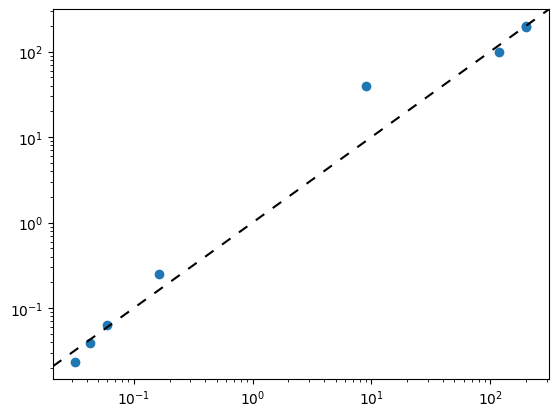

In [70]:
import matplotlib.pyplot as plt 
plt.scatter(ref_sol, sol) 
plt.axline((0, 0.), slope=1, color="black", linestyle=(0, (5, 5)))

plt.axline((0, 0.), slope=1.05, color="grey", linestyle=(0, (2, 2)))
plt.axline((0, 0.), slope=0.95, color="grey", linestyle=(0, (2, 2)))

plt.loglog()


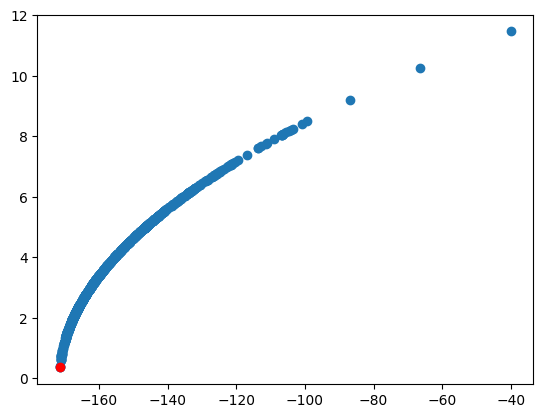

In [52]:
import matplotlib.pyplot as plt
energy = []
residue = []
solutions = []
for s in sampleset.record:
    energy.append(s[1])
    sol = qubo.decode_solution(s[0])
    sol = sol[0] + sol[1]
    solutions.append(sol)
    r = net.verify_solution(np.array(sol).reshape(-1,))
    residue.append(np.linalg.norm(r))
plt.scatter(energy, (residue))

el, rl = [], []
for s in sampleset.lowest().record:
    el.append(s[1])
    sol = qubo.decode_solution(s[0])
    sol = sol[0] + sol[1]
    r = net.verify_solution(np.array(sol).reshape(-1,))
    rl.append(np.linalg.norm(r+1E-12))
plt.scatter(el, rl, c='red')

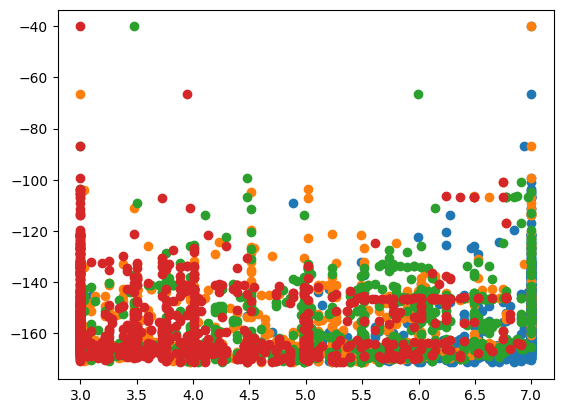

In [67]:
solutions = np.array(solutions)
nsample = solutions.shape[1]

for isol in range(5,9):
    plt.scatter(solutions[:,isol], energy)





In [56]:
solutions

array([[3.528, 0.504, 0.126, 0.   , 2.047, 4.48 , 3.63 , 6.024, 3.   ],
       [2.079, 1.071, 2.142, 1.008, 0.504, 7.   , 5.11 , 3.031, 3.409],
       [3.087, 1.008, 1.008, 2.52 , 0.   , 6.559, 7.   , 4.26 , 3.   ],
       [3.024, 2.016, 0.535, 0.252, 0.346, 7.   , 3.976, 5.929, 5.016],
       [3.024, 2.299, 1.008, 0.189, 1.008, 7.   , 3.   , 4.984, 3.504],
       [3.213, 2.016, 1.008, 0.504, 0.504, 6.276, 3.094, 5.016, 3.724],
       [3.15 , 0.504, 2.016, 0.   , 1.291, 6.087, 4.449, 3.346, 3.063],
       [3.024, 0.252, 0.126, 0.   , 0.504, 5.961, 5.425, 5.488, 4.984],
       [3.024, 2.016, 2.52 , 0.504, 1.008, 7.   , 3.094, 3.   , 3.   ],
       [2.016, 0.504, 0.567, 0.   , 0.504, 7.   , 6.717, 6.78 , 6.654],
       [2.016, 2.016, 1.008, 0.252, 1.008, 7.   , 3.504, 5.488, 3.945],
       [2.331, 2.268, 1.008, 0.252, 0.661, 7.   , 3.   , 5.205, 4.008],
       [1.89 , 2.016, 1.008, 0.252, 1.071, 7.   , 3.504, 5.488, 3.882],
       [3.024, 2.268, 3.15 , 0.504, 0.504, 7.   , 3.   , 3.   , 